# Project 4: Exploratory Data Analysis

**Author:** Stacey Olson <br>
**Purpose:** Guided exploratory data analysis using a shared dataset <br>
**Date:** September 17, 2025

> **What this notebook does**  
> I explore the classic Iris dataset to understand which measurements best distinguish species.  
> **Key questions**:  
> 1) Which features separate species most clearly?  
> 2) Are there missing values or outliers?  
> 3) Can a simple engineered feature (Sepal Area) add signal?

## 1. Imports

**Why these libraries?**  
`pandas` for data frames, `seaborn/matplotlib` for quick, readable visuals.  
I’ll favor simple, default plots and annotate insights beneath each figure.

In [160]:
import pandas as pd
import seaborn as sns
import matplotlib

# Axes object (basic plot type returned by Seaborn)
from matplotlib.axes import Axes

## 2. Load Data

**What I’m loading & why**  
I use Seaborn’s built-in Iris dataset so I can focus on the EDA process (not data wrangling).  
Goal here: confirm the data loads and get a quick feel for the columns.

In [161]:
# Load the Iris dataset into a pandas DataFrame
iris_df = pd.DataFrame(sns.load_dataset('iris'))

# List column names
iris_df.columns

# Inspect the first few rows of the DataFrame
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 3. Initial Data Inspection

**What I’m checking**  
- First rows: sanity check on values and formatting  
- Shape, dtypes, info: row/column counts, numeric vs categorical, and nulls  
**Why it matters**  
This catches obvious issues early and influences what plots/tests make sense next.

In [162]:
# Show the first 10 rows to get an overview of the data
iris_df.head(10)

# Check the shape of the DataFrame (rows, columns)
iris_df.shape

# Check the data types of each column
iris_df.dtypes

# Get a summary of column data types, non-null counts, and memory usage
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Data Quality Check
I also checked for nulls and duplicate rows to confirm the dataset is analysis-ready.
python
Copy code

In [163]:
# Missing values and duplicates
iris_df.isna().sum(), iris_df.duplicated().sum()

(sepal_length    0
 sepal_width     0
 petal_length    0
 petal_width     0
 species         0
 dtype: int64,
 np.int64(1))

**Result:** No missing values and no duplicate rows, so I can proceed without cleaning.

## 4. Initial Descriptive Statistics

**Plan for this step**  
I’ll use `.describe()` to spot typical ranges and potential anomalies.  
I’m watching for unusually wide spreads or min/max values that look off.

In [164]:
# Inspect summary statistics for numerical columns
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 5. Initial Data Distribution for Numerical Columns

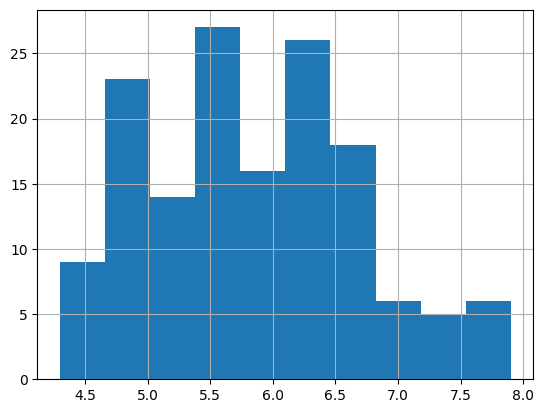

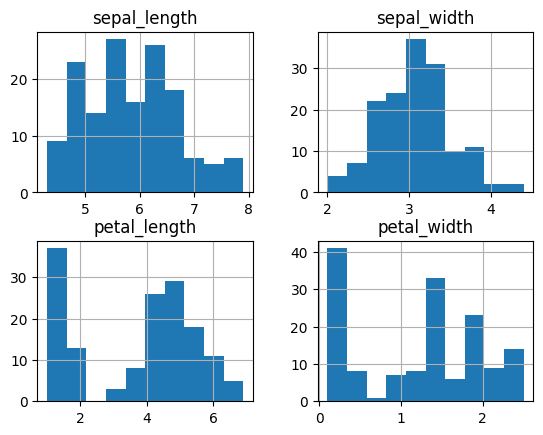

In [165]:
# Inspect histogram for one numerical column
iris_df['sepal_length'].hist()

# Inspect histograms for ALL numerical columns
iris_df.hist()

# Show all plots
import matplotlib.pyplot as plt
plt.show()

## Observations

**Sepal Length & Width:**  
Fairly bell-shaped distributions but with some skew (especially sepal width leaning slightly left)  
No extreme outliers visible  

**Petal Length & Petal Width:**  
Very distinct clusters: one group of very small values and another group of larger values.  
This reflects the natural separation between the three iris species.

**So what?**  
The bimodal/clustered petal features hint that species separation might be strongest on petals—not sepals.

**Expectation vs. reality:** I expected roughly normal shapes; petals show clear clustering instead, which foreshadows class separation.

## 5. Initial Data Distribution for Categorical Columns

**Why look at categories now?**  
Balanced classes avoid misleading accuracy later. I’ll confirm class counts and visualize them.

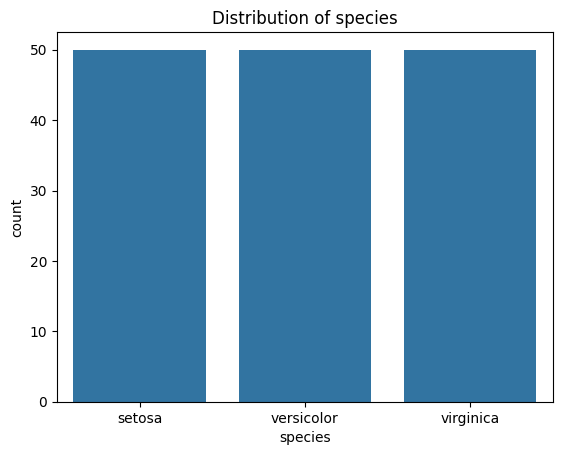

In [166]:
# Inspect value counts for the 'species' column
iris_df['species'].value_counts()

# Count plot for each categorical column
for col in iris_df.select_dtypes(include=['object', 'category']).columns:
    sns.countplot(x=col, data=iris_df)
    plt.title(f'Distribution of {col}')
    plt.show()

## Observations

- The dataset contains **three species**: setosa, versicolor, and virginica.  
- Each species has **50 samples**, so they are **evenly distributed** across the dataset.

**Expectation vs. reality:** I expected roughly normal shapes; petals show clear clustering instead, which foreshadows class separation.

**Modeling note:** Balanced classes (50/50/50) mean accuracy won’t be inflated by class imbalance.

## 6. Initial Data Transformation and Feature Engineering

**Design choice**  
For readability, I title-case the measurement names and engineer **Sepal Area = Length × Width** to test if a simple combination adds separation.

**Trade-off:** Using spaces in names improves readability but requires bracket notation (e.g., `df['Sepal Length']`). I accept this for clarity in plots.

In [167]:
# --- Renaming all columns for clarity ---
iris_df.rename(columns={
    'sepal_length': 'Sepal Length',
    'sepal_width': 'Sepal Width',
    'petal_length': 'Petal Length',
    'petal_width': 'Petal Width',
    'species': 'Species'
}, inplace=True)

# --- Adding a new column (feature engineering) ---
iris_df['Sepal Area'] = iris_df['Sepal Length'] * iris_df['Sepal Width']

# --- Verify the changes ---
iris_df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species,Sepal Area
0,5.1,3.5,1.4,0.2,setosa,17.85
1,4.9,3.0,1.4,0.2,setosa,14.70
2,4.7,3.2,1.3,0.2,setosa,15.04
3,4.6,3.1,1.5,0.2,setosa,14.26
4,5.0,3.6,1.4,0.2,setosa,18.00


**Checkpoint**  
Columns are consistently named; `Sepal Area` is present. Next, I’ll visualize to see whether this feature adds useful signal.

## 7. Initial Visualizations

**Visualization strategy**  
Start broad with a pairplot to scan all numeric relationships by species; then zoom into a focused scatter using the new feature.

**Reading guide:** In the pairplot, look along the scatter panels (off-diagonal). Clear color separation means a feature pair is informative for classifying species.

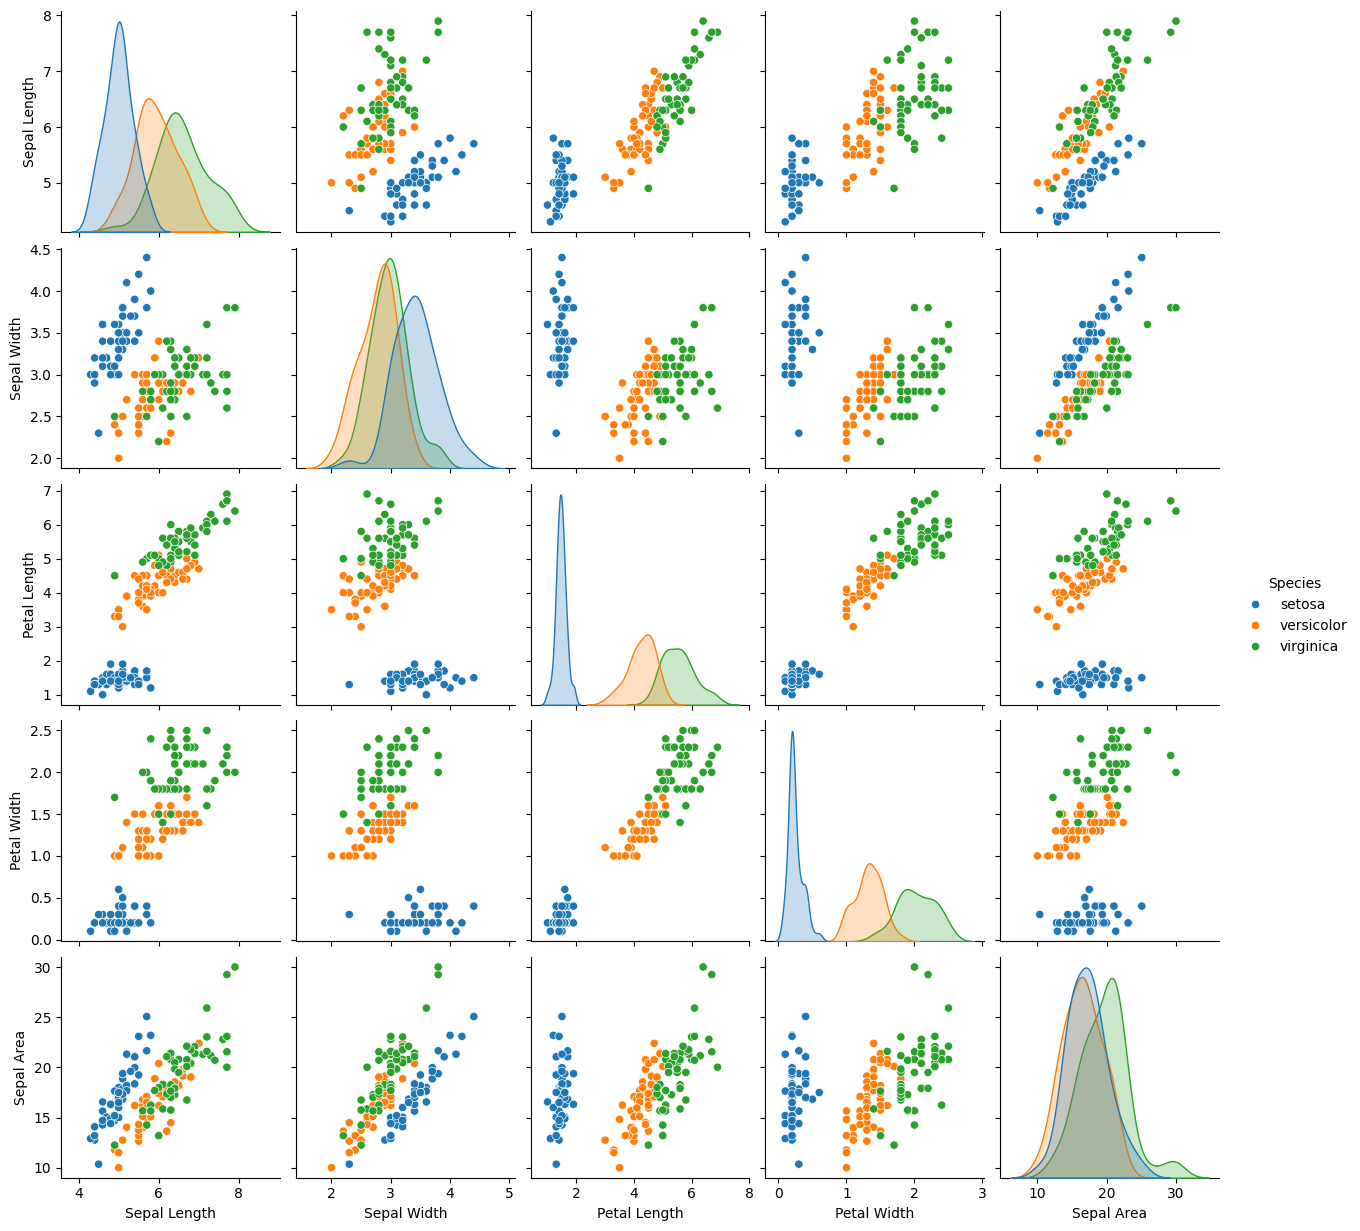

In [168]:
# Create a pairplot to visualize relationships between numerical features
# The 'hue' parameter colors the points by species
sns.pairplot(iris_df, hue='Species')

# Show the plot
plt.show()

## Observations

- Species are clearly separated by petal length and petal width.  
- Sepal measurements show more overlap between species.  
- This suggests petal features are more useful for classification.

**Implication**  
If I were building a classifier, I’d prioritize `Petal Length` and `Petal Width` and treat sepal features as secondary.

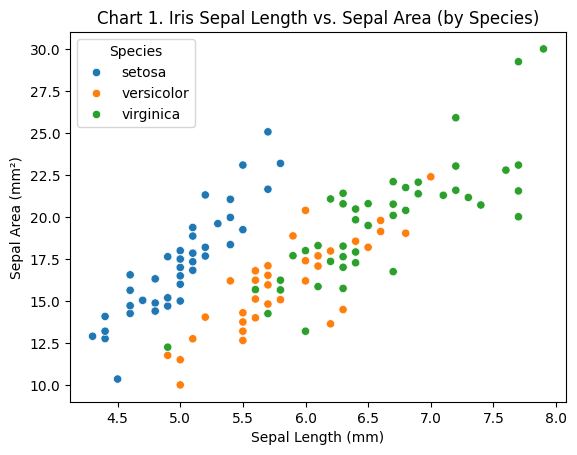

In [169]:
# A scatter plot is a plot of two numerical variables.
scatter_plt: Axes = sns.scatterplot(
    data=iris_df, 
    x="Sepal Length", 
    y="Sepal Area", 
    hue="Species"
)

# Set axis labels using the Matplotlib Axes methods
scatter_plt.set_xlabel("Sepal Length (mm)")
scatter_plt.set_ylabel("Sepal Area (mm²)")

# Set the title using the Matplotlib Axes method
scatter_plt.set_title("Chart 1. Iris Sepal Length vs. Sepal Area (by Species)")

plt.show()

## Observations
- Sepal Area increases proportionally with Sepal Length.  
- Different species show overlapping but distinguishable clusters.  
- This suggests Sepal Area could help separate species, but not as clearly as petal measurements.

**Takeaway**  
`Sepal Area` tracks with length but doesn’t cleanly split species. It may help a little in a multifeature model but isn’t a silver bullet.

**Next curiosity:** Sepal Area might still contribute in a multifeature model even if it doesn’t separate classes by itself.

## 8. Initial Insights

Based on my exploratory data analysis of the Iris dataset:

- The dataset contains **150 samples**, evenly split into **three species**: setosa, versicolor, and virginica.  
- **Petal length and petal width** show clear separation between species, suggesting they are strong predictors for classification.  
- **Sepal length and sepal width** have more overlap between species, though some clustering is still visible.  
- The new **Sepal Area feature** shows a positive relationship with sepal length, but does **not fully separate species** on its own.  
- There are **no missing values or extreme outliers** in the dataset, and all numerical features appear to be on similar scales.  

These insights help build an early understanding of the data and can guide future steps such as feature selection and model building.

## Next Steps (if modeling)
- Try a simple classifier (e.g., logistic regression or k-NN) using petals first, then add sepals and `Sepal Area`.  
- Use train/test split and report accuracy + confusion matrix by species.  
- Consider standardization if using distance-based models.

## Executive Summary
Petal measurements (length, width) strongly separate species; sepal measurements overlap.  
The dataset is clean and balanced, so simple baseline models should perform well.  
A simple engineered feature (Sepal Area) adds limited separation alone but may help in combination.